# Name:Shubham Manish Hedavkar

## Task 1 - Prediction Using Supervised Learning 

### Predict the percentage of an student based on the no. of study hours.

### Dataset - http://bit.ly/w-data

In [2]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### Reading the csv file

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#finding the correaltion between dependent and independent variable
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Plotting the relationship

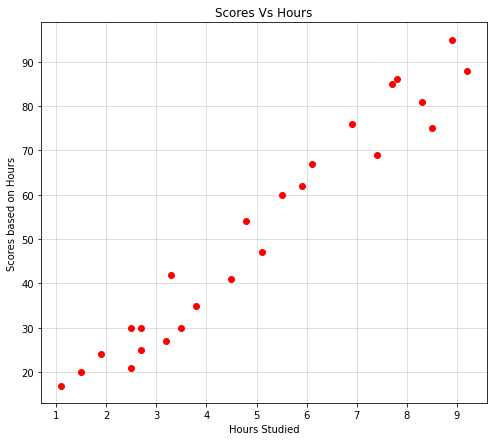

In [7]:
a = df['Hours']  #independent variable
b = df['Scores'] #dependent variable

plt.figure(figsize=[8,7])
plt.plot(a,b,'ro')
plt.title('Scores Vs Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Scores based on Hours')
plt.grid(alpha=0.5)
plt.show()

#### Performing the train test split

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### Training the algorithm

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [11]:
reg.fit(X_train,y_train)

LinearRegression()

In [12]:
#Predicting the test results
y_pred = reg.predict(X_test)
y_pred                       

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Comparing actual vs predicted values

In [13]:
d = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
d.head()

,Actual Value,Predicted Value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


#### Plotting the regression

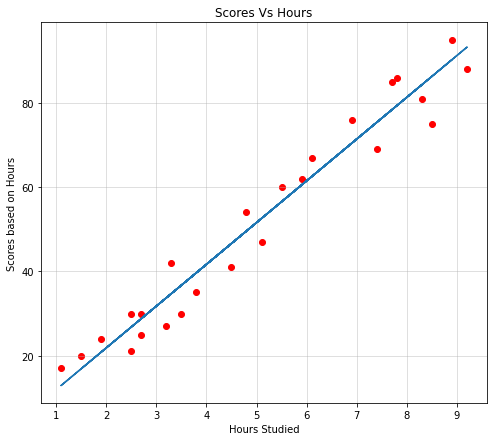

In [15]:
line = reg.coef_*X + reg.intercept_
plt.figure(figsize=[8,7])
plt.scatter(X,y,color='r')
plt.plot(X,line)
plt.title('Scores Vs Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Scores based on Hours')
plt.grid(alpha=0.5)
plt.show()

#### Making the prediction of score for 9.25 hours

In [24]:
Hours = [[9.25]]
pred_ans = reg.predict(Hours)
print('The predicted score if student studies for 9.25 hours a days is: {}'.format(pred_ans))

The predicted score if student studies for 9.25 hours a days is: [93.69173249]


#### Model Evaluation

- Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are the most popular evaluation metrics used in regression problems.

- Lower the values of these Evaluation metrics, better is the performance of the model.

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
